In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta al DW
db_path = "C:/Users/Nico/Desktop/DATA SCIENCE/PP- VOLUNTAREADO/chivas-ml/data/external/chivas_dw.sqlite"

# Conexión a la BD
conn = sqlite3.connect(db_path)

# Cargar la vista consolidada (ya tiene todas las métricas)
df = pd.read_sql("SELECT * FROM vw_predicciones_diarias_extendida_v3", conn)
conn.close()




In [2]:
# =============================================
# 2.1 FILTRO DE JUGADORES Y MICRO-CICLOS
# =============================================

print(f"Registros cargados pre filtrado: {len(df)}\n")

# Jugadores que deben excluirse
jugadores_excluir = [1, 2, 3, 12, 30]

# Filtrar jugadores no válidos
df = df[~df["id_jugador"].isin(jugadores_excluir)]

# fFiltramos los días nulos o no validos (elimina microciclos fuera de competencia):
df = df[df['tipo_dia_next'].notnull()]


print(f"Registros cargados post filtrado: {len(df)}\n")
# Distribución de la etiqueta
print("\nDistribución de tipo_semana_next:")
print(df['tipo_semana_next'].value_counts(normalize=True) * 100)

Registros cargados pre filtrado: 2654

Registros cargados post filtrado: 1835


Distribución de tipo_semana_next:
tipo_semana_next
RECUPERO    52.070335
CARGA       28.304027
MANTENER    19.625638
Name: proportion, dtype: float64


In [3]:
# Filtramos solo entrenamientos (descartamos descansos/partidos)
df = df[df["Tipo_Dia"] == "ENTRENO"]

# Promedio de carga total por tipo_dia_next
df_agg = (
    df.groupby("tipo_dia_next")[["CT_total_actual", "CE_total_actual", "CS_total_actual", "Carga_Explosiva", "Carga_Sostenida", "Carga_Regenerativa"]]
    .mean()
    .sort_index()
    .round(2)
)

print("Promedio de cargas reales por tipo de día:")
print(df_agg)

Promedio de cargas reales por tipo de día:
               CT_total_actual  CE_total_actual  CS_total_actual  \
tipo_dia_next                                                      
-2.0                  14876.78          2072.84          3827.86   
-1.0                  13669.83          1890.24          3460.55   
 1.0                  14008.67          1945.33          3570.98   
 2.0                  13767.68          1854.49          3458.98   
 3.0                  15528.86          2156.48          4049.88   

               Carga_Explosiva  Carga_Sostenida  Carga_Regenerativa  
tipo_dia_next                                                        
-2.0                    255.79           532.62             1596.72  
-1.0                    222.68           437.18             1323.21  
 1.0                    420.57           745.96             1566.26  
 2.0                    372.92           715.22             1844.87  
 3.0                    504.22           936.39             

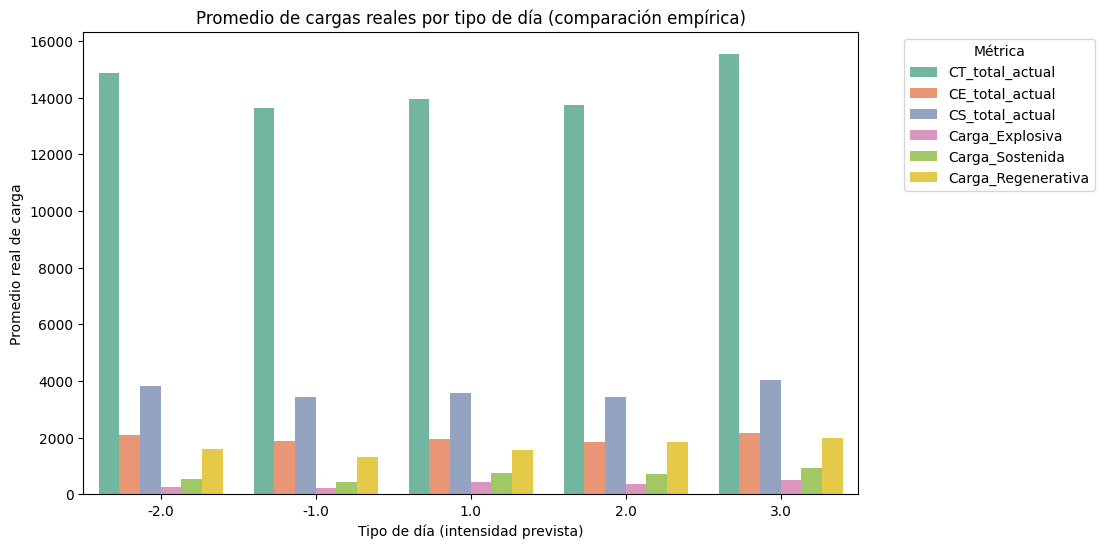

In [2]:
# Convertimos a formato largo para graficar fácilmente
df_melt = df_agg.reset_index().melt(id_vars="tipo_dia_next", var_name="Métrica", value_name="Promedio")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melt, x="tipo_dia_next", y="Promedio", hue="Métrica", palette="Set2")
plt.title("Promedio de cargas reales por tipo de día (comparación empírica)")
plt.xlabel("Tipo de día (intensidad prevista)")
plt.ylabel("Promedio real de carga")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
